# Introduction
Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.
The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments.

Classification and data mining methods are an effective way to classify data. Especially in medical field, where those methods are widely used in diagnosis and analysis to make decisions.

## Some Risk Factors for Breast Cancer
**Age** The chance of getting breast cancer increases as women age. Nearly 80 percent of breast cancers are found in women over the age of 50.

**Personal history of breast cancer** A woman who has had breast cancer in one breast is at an increased risk of developing cancer in her other breast.

**Family history of breast cancer** A woman has a higher risk of breast cancer if her mother, sister or daughter had breast cancer, especially at a young age (before 40). Having other relatives with breast cancer may also raise the risk.

**Genetic factors** Women with certain genetic mutations, including changes to the BRCA1 and BRCA2 genes, are at higher risk of developing breast cancer during their lifetime. Other gene changes may raise breast cancer risk as well.

**Childbearing and menstrual history** The older a woman is when she has her first child, the greater her risk of breast cancer. Also at higher risk are:
* Women who menstruate for the first time at an early age (before 12)
* Women who go through menopause late (after age 55)
* Women who’ve never had children

## Attribute Information:
1) ID number 

2) Diagnosis (M = malignant, B = benign)

3–32)
* Ten real-valued features are computed for each cell nucleus:
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter² / area — 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing our cancer dataset
data = pd.read_csv('C:/Users/hp/Downloads/data.csv')
data.head()                    

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Find dimesions
print("Cancer data set dimensions : {}".format(data.shape))

Cancer data set dimensions : (569, 33)


## DATA CLEANING
#### Check for null values

In [19]:
data.isnull().sum()
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Unnames: 32 is the only attribute with null values and in this, all are null values

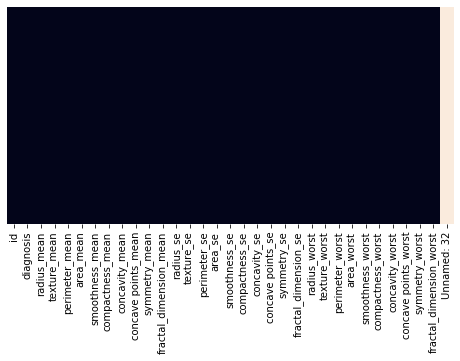

In [6]:
plt.figure(figsize=(8,4))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

There are no null values in this data set

#### Drop useless variables

In [7]:
df = data.drop(['Unnamed: 32','id'],axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#Diving dataset into X and Y axis
X = df.iloc[:, 1:31].values
Y = df.iloc[:, 0].values

## DATA EXPLORATION

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


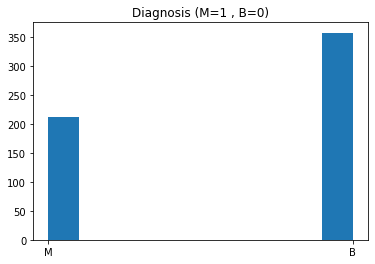

In [10]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

## CONVERTING CATEGORICAL DATA TO NUMERIC VALUES

In [11]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

1 for Malignant and 0 for Benign

## DATA VISUALIZATION

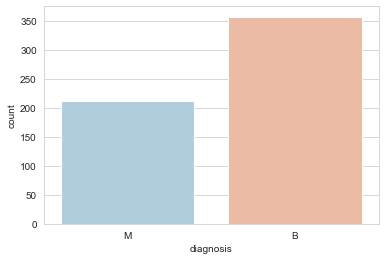

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df,palette='RdBu_r')

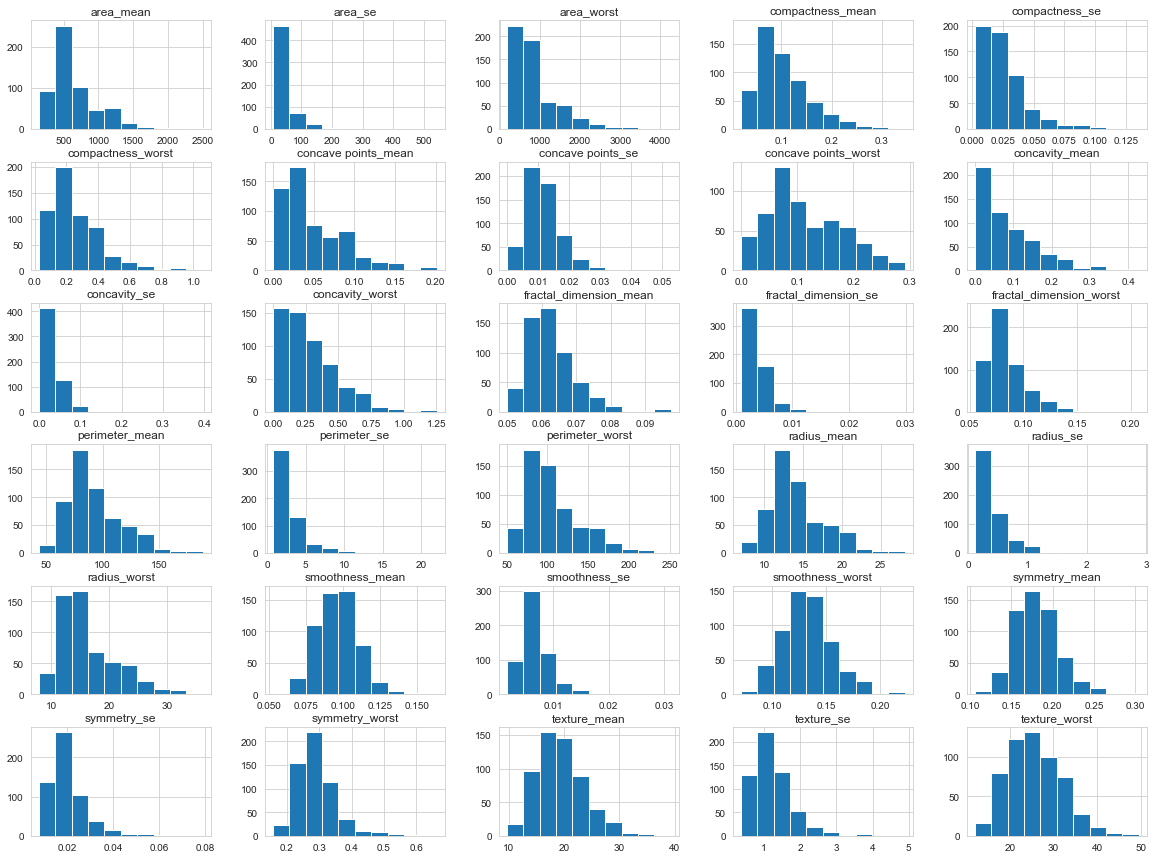

In [13]:
import matplotlib.pyplot as plt

num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.show()

## TRAIN TEST SPLIT

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [86]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## MODEL SELECTION

In [87]:
clfs = []
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(X_train, Y_train)
log_r.score(X_test, Y_test)
clfs.append(log_r)

# SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
np.random.seed(1)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(SVC(probability=True), param_grid, cv = kfolds, refit=True, verbose=1)
grid_svm.fit(X_train, Y_train)
grid_svm.score(X_test, Y_test)
clfs.append(grid_svm)

#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test)
clfs.append(classifier)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    5.0s finished


In [88]:
# test the models with test data and print their accuracy scores
print('lr: {}'.format(log_r.score(X_test, Y_test)))
print('svm: {}'.format(grid_svm.score(X_test, Y_test)))
print('knn: {}'.format(classifier.score(X_test, Y_test)))

lr: 0.9766081871345029
svm: 0.9766081871345029
knn: 0.9590643274853801


The accuracy of logistic regression and SVM is the same and is more than that of KNN

## CONFUSION MATRIX

#### For logistic regression

[[107   1]
 [  3  60]]


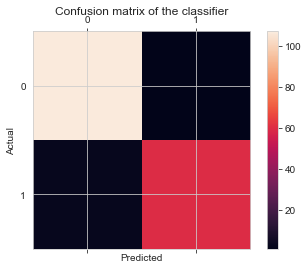



              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [89]:
from sklearn.metrics import classification_report, confusion_matrix
import pylab as plt
labels=[0,1]
Y_pred = log_r.predict(X_test)
cmx=confusion_matrix(Y_test,Y_pred, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(Y_test, Y_pred))

#### For support vector machine

[[106   2]
 [  2  61]]


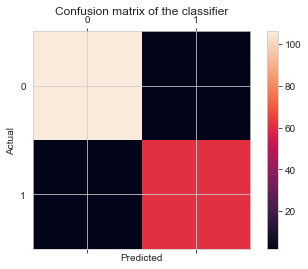



              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [90]:
labels=[0,1]
Y_pred = grid_svm.predict(X_test)
cmx=confusion_matrix(Y_test,Y_pred, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(Y_test, Y_pred))

#### For KNN

[[107   1]
 [  6  57]]


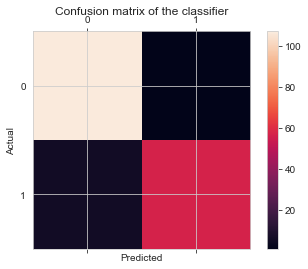



              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [91]:
labels=[0,1]
Y_pred = classifier.predict(X_test)
cmx=confusion_matrix(Y_test,Y_pred, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(Y_test, Y_pred))

## ROC CURVE

#### For logistic regression

In [92]:
model = log_r.fit(X_train, Y_train)

In [93]:
lr_probs = model.predict(X_test)

No handles with labels found to put in legend.


Logistic: ROC AUC=0.972


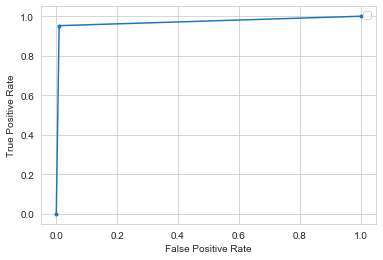

In [94]:
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### For SVM

In [95]:
model = grid_svm.fit(X_train, Y_train)
lr_probs = model.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.9s finished


No handles with labels found to put in legend.


Logistic: ROC AUC=0.975


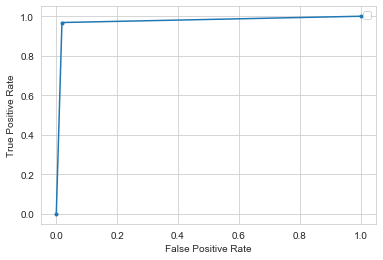

In [96]:
# calculate scores
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### For KNN

In [97]:
model = classifier.fit(X_train, Y_train)
lr_probs = model.predict(X_test)

No handles with labels found to put in legend.


Logistic: ROC AUC=0.948


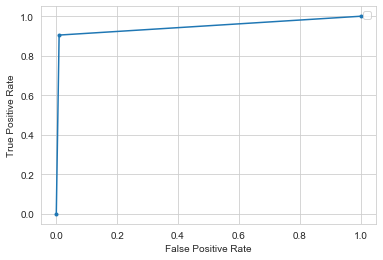

In [98]:
# calculate scores
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

We can see from ROC curve as well that Logistic Regression and SVM are better models than KNN for this data analysis